# Titanic Tutorial for Beginners[Accuracy: 86.64(Training Data)]-


* This is my second tutorial on this problem statement. Do point out my mistakes in comment section.
* Do upvote if you find this notebook interesting.
* In previous tutorial(https://www.kaggle.com/rishabhdhyani4/titanic-tutorial), I ignored Name feature which I have corrected in this tutorial and achieved better accuracy.

 This is default first cell in any kaggle kernel. They import **NumPy** and **Pandas** libraries and it also lists the available Kernel files.** NumPy** is the fundamental package for scientific computing with Python. **Pandas** is the most popular python library that is used for data analysis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


# Data Loading


Our first step is to extract train and test data. We will be extracting data using pandas function read_csv. Specify the location to the dataset and import them.

In [2]:
# Reading data
df_train=pd.read_csv('/kaggle/input/titanic/train.csv')
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')
df_test_copy=df_test.copy()

In [3]:
# Have a first look at train data
print(df_train.shape)

(891, 12)


By using df_train.shape we get to know that train data has 891 rows and 12 columns.

In [4]:
# Now, lets explore first five data from training set.
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We got 12 features in our training data. From https://www.kaggle.com/c/titanic/data, we have:

* Survival = Survival
* Pclass = Ticket class
* Sex = Sex
* Age = Age in years
* Sibsp = # of siblings / spouses aboard the Titanic
* Parch = # of parents / children aboard the Titanic
* Ticket = Ticket number
* Fare = Passenger fare
* Cabin = Cabin number
* Embarked = Port of Embarkation

Qualitative Features (Categorical) : PassengerId , Pclass , Survived , Sex , Ticket , Cabin , Embarked.

Quantitative Features (Numerical) : SibSp , Parch , Age , Fare.

It is obvious from the problem statement that we have to predict **Survival** feature.

In [5]:
# We will use describe function to calculate count,mean,max and other for numerical feature.
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
# The feature survived contain binary data which can also be seen from its max(1) and min(0) value.

**Our next step is to examine NULL values.**

In [7]:
# Have a look for possible missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# We see that Age, Cabin and Embarked feature have NULL values.

In [10]:
# Have a first look at test data
print(df_test.shape)

(418, 11)


In [11]:
# Have a look at train and test columns
print('Train columns:', df_train.columns.tolist())
print('Test columns:', df_test.columns.tolist())

Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


It looks OK, the only additional column in train is 'Survived', which is our target variable, i.e. the one we want to actually predict in the test dataset.

In [12]:
# Let's look at the figures and Understand the Survival Ratio
df_train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [13]:
# We observe that less people survived.

In [14]:
# To get better understanding of count of people who survived, we will plot it.

# Load our plotting libraries

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


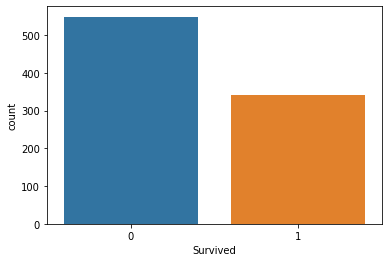

In [16]:
sns.countplot(x='Survived',data=df_train)

So, out of 891 examples only 342 (38%) survived and rest all died.

# Feature Examining-

## ** Pclass**
 Come, let's examine Survival based on Pclass.

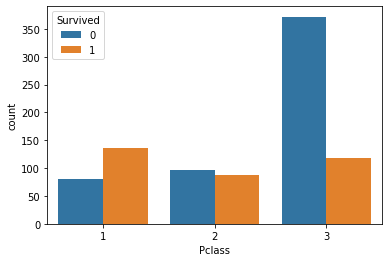

In [17]:
sns.countplot(x='Pclass',data=df_train,hue='Survived')

**On examining the chart above, wer can clearly say that people belonging to third class died in large numbers.**

##  **Sex**

Come, let's examine Survival based on gender.

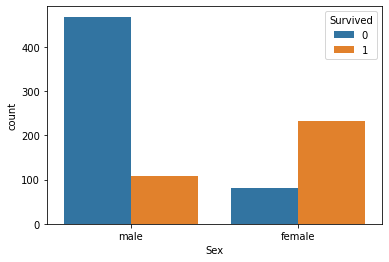

In [18]:
sns.countplot(x='Sex',data=df_train,hue='Survived')

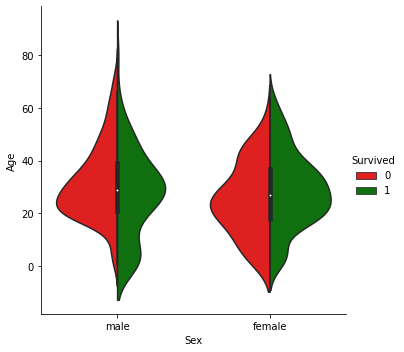

In [19]:
sns.catplot(x='Sex' , y='Age' , data=df_train , hue='Survived' , kind='violin' , palette=['r','g'] , split=True)

**On examining the chart above, we can clearly say that male are more likely to die in comparision to female.**

In [20]:
# Creating function to convert Sex attribute to numerical feature.
def mappy(frame):
    
    frame['Sex'] = frame.Sex.map({'female': 1 ,  'male': 0}).astype(int)
    

In [21]:
mappy(df_train)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [22]:
mappy(df_test)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


## **Age**

Come, let's examine Survival based on gender.

**We have noticed earlier that column Age has some null values. So. first we will complete the Age column and then we will analyze it.**

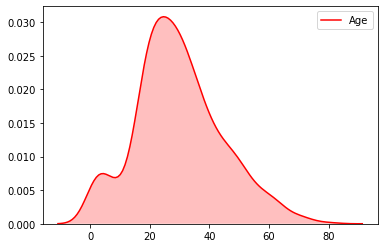

In [23]:
sns.kdeplot(df_train.Age , shade=True , color='r')

**Fill the Age with it's Median, and that is because, for a dataset with great Outliers, it is advisable to fill the Null values with median.**

In [24]:
#Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
# Now we will be filling missing age values. This is used to fill the age according to Pclass and Sex.
combine = [df_train, df_test]
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [26]:
print(df_train.Age.count())  # Null values filled

891


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


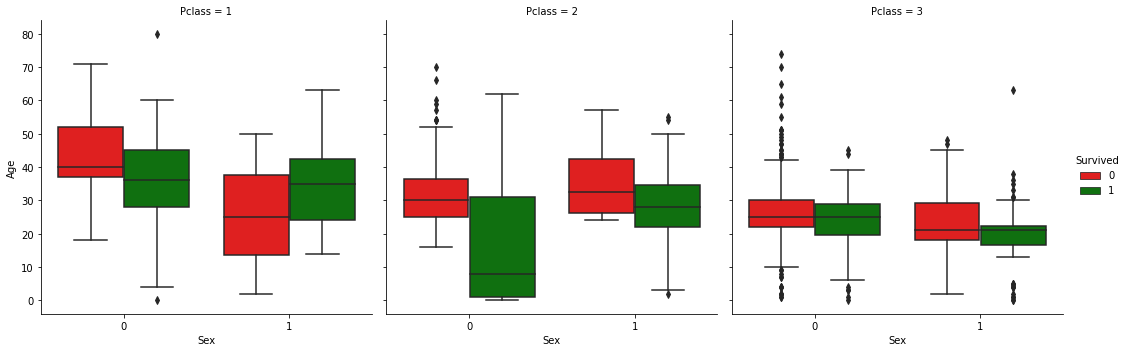

In [27]:
sns.factorplot(x='Sex',y='Age' , col='Pclass', data=df_train , hue='Survived' , kind = 'box', palette=['r','g'])

In [28]:
# Understanding Box Plot :

# The bottom line indicates the min value of Age.
# The upper line indicates the max value.
# The middle line of the box is the median or the 50% percentile.
# The side lines of the box are the 25 and 75 percentiles respectively.

## **Fare**

Come, let's examine Survival based on Fare.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x2160 with 0 Axes>

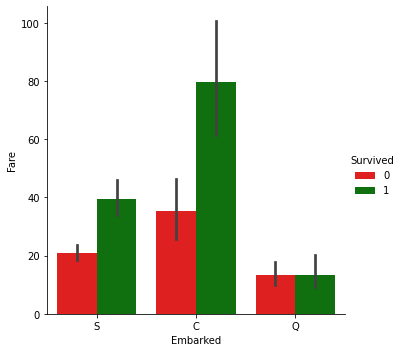

In [29]:
plt.figure(figsize=(20,30))
sns.factorplot(x='Embarked' , y ='Fare' , kind='bar', data=df_train , hue='Survived' , palette=['r','g'])

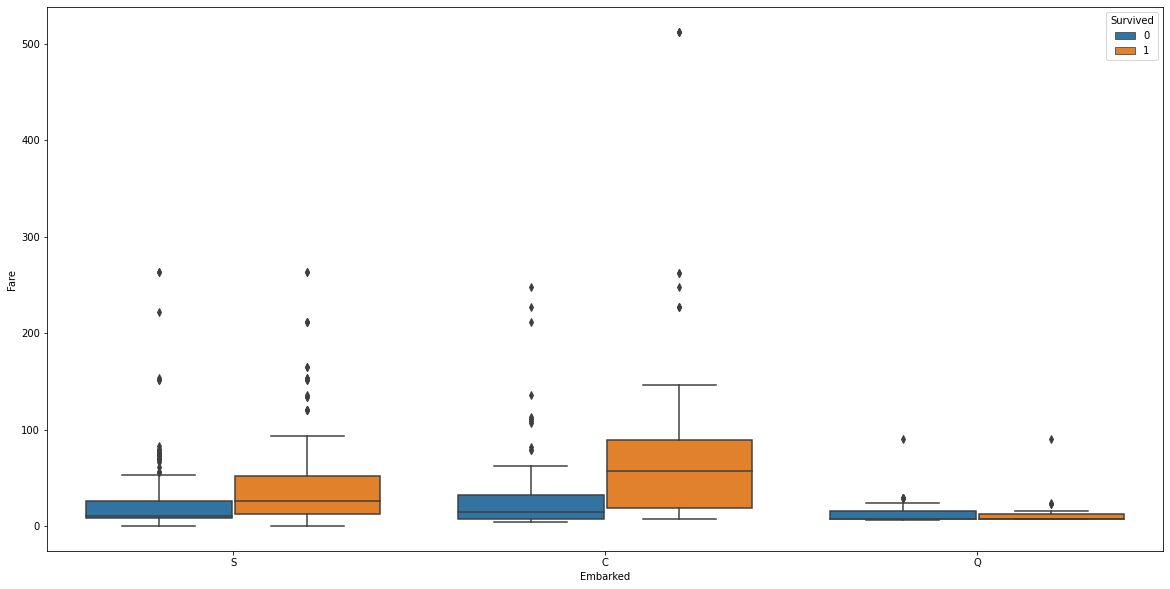

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Embarked',y='Fare',data=df_train,hue='Survived')

**We observe that people who paid more are more likely to survive.**

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 36.0+ KB


In [32]:
# We notice that fare has one missing value.
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,NaN,S


## **Embarked**

Come, let's examine Survival based on Embarked.

**We have noticed earlier that column Embarked has some null values. So. first we will complete this column and then we will analyze it.**

In [33]:
# The best way to fill it would be by most occured value
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0] ,inplace=True)

In [34]:
df_train.Embarked.count() # filled the values with Mode.

891

## **Cabin**

Come, let's examine Survival based on Embarked.

In [35]:
#Since Cabin has so many missing value, we will remove that column.

In [36]:
df_train.drop('Cabin',axis=1,inplace=True)

In [37]:
df_test.drop('Cabin',axis=1,inplace=True)

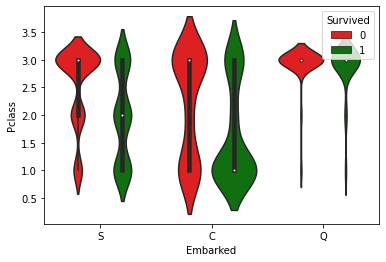

In [38]:
sns.violinplot(x='Embarked' , y='Pclass' , data=df_train , hue='Survived' , palette=['r','g'])

**We can see that those who embarked at C with First Class ticket had a good chance of Survival. Whereas for S, it seems that all classes had nearly equal probability of Survival. And for Q, third Class seems to have Survived and Died with similar probabilities.**

In [39]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
# None of the columns are empty.

## **SibSp**

Now lets analyze SibSp column.

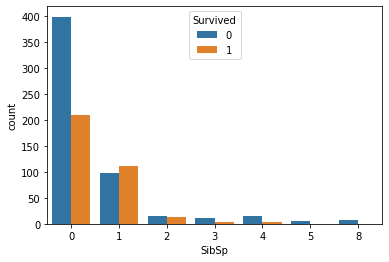

In [41]:
sns.countplot(data=df_train,x='SibSp',hue='Survived')

In [42]:
df_train[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


**It seems that there individuals having 1 or 2 siblings/spouses had the highest Probability of Survival, followed by individuals who were Alone.**

## **Parch**

Now lets analyze Parch column.

In [43]:
df_train[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


**It seems that individuals with 1,2 or 3 family members had a greater Probability of Survival, followed by individuals who were Alone.**

**Now let us perform some feature engineering to get informative and valuable attributes.**

# **Feature Engineering:**

**We need to analyze Name feature.  Based on it we will retain the new Title feature for model training.**

In [44]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


**We can replace many titles with a more common name or classify them as Rare.**

In [45]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [46]:
# We will be converting categorical titles to numerical.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,S,1


**Now let us create an attribute 'Alone' so that we could know whether the passenger is travelling alone or not.**

In [47]:
df_train['Alone'] = 0
df_train.loc[(df_train['SibSp']==0) & (df_train['Parch']==0) , 'Alone'] = 1

df_test['Alone'] = 0
df_test.loc[(df_test['SibSp']==0) & (df_test['Parch']==0) , 'Alone'] = 1

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,S,3,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,S,1,1


*  Now we are going to drop features which are not contributing much.
* Names, PassengerId and Ticket Number doesn't help in finding Probability of Survival.
* We have created Alone feature and therefore I'll be Dropping SibSp and Parch.

In [49]:
drop_features = ['PassengerId' , 'Name' , 'SibSp' , 'Parch' , 'Ticket' ]

df_train.drop(drop_features , axis=1, inplace = True)

In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
Title          418 non-null int64
Alone          418 non-null int64
dtypes: float64(1), int64(8), object(3)
memory usage: 39.3+ KB


In [51]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Alone
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,S,3,0
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,Q,1,1
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,S,3,0


In [52]:
drop_featuress = ['PassengerId' , 'Name' , 'SibSp' , 'Parch' , 'Ticket' ]

df_test.drop(drop_featuress , axis=1 , inplace = True)

In [53]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,0,34,7.8292,Q,1,1
1,3,1,47,7.0000,S,3,0
2,2,0,62,9.6875,Q,1,1
3,3,0,27,8.6625,S,1,1
4,3,1,22,12.2875,S,3,0


### Lets convert categorical feature into numerical value.

* Divide Age into 5 categories and Map them with 0/1/2/3/4.
* Divide Fare into 4 categories and Map them to 0/1/2/3.
* Embarked Attribute has (S/C/Q) , which will be mapped to 0/1/2.

In [54]:
def mapping(frame):
    
    
    
    frame['Embarked'] = frame.Embarked.map({'S' : 0 , 'C': 1 , 'Q':2}).astype(int)
    
    
    
    frame.loc[frame.Age <= 16 , 'Age'] = 0
    frame.loc[(frame.Age >16) & (frame.Age<=32) , 'Age'] = 1
    frame.loc[(frame.Age >32) & (frame.Age<=48) , 'Age'] = 2
    frame.loc[(frame.Age >48) & (frame.Age<=64) , 'Age'] = 3
    frame.loc[(frame.Age >64) & (frame.Age<=80) , 'Age'] = 4
    
    
    frame.loc[(frame.Fare <= 7.91) , 'Fare'] = 0
    frame.loc[(frame.Fare > 7.91) & (frame.Fare <= 14.454) , 'Fare'] = 1
    frame.loc[(frame.Fare > 14.454) & (frame.Fare <= 31) , 'Fare'] = 2
    frame.loc[(frame.Fare > 31) , 'Fare'] = 3

In [55]:
mapping(df_train)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1,0.0,0,1,0
1,1,1,1,2,3.0,1,3,0
2,1,3,1,1,1.0,0,2,1
3,1,1,1,2,3.0,0,3,0
4,0,3,0,2,1.0,0,1,1


In [56]:
mapping(df_test)
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,0,2,0.0,2,1,1
1,3,1,2,0.0,0,3,0
2,2,0,3,1.0,2,1,1
3,3,0,1,1.0,0,1,1
4,3,1,1,1.0,0,3,0


**We can also create an artificial feature combining Pclass and Age.**

In [57]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

df_train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


# **Now, it's right time to choose best model.**

In [58]:
# Importing some algorithms from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [59]:
x_train = df_train.drop("Survived", axis=1)
y_train = df_train["Survived"]
x_test=df_test.copy()

In [60]:
models = [LogisticRegression(),
        DecisionTreeClassifier(),SVC(),RandomForestClassifier()]

model_names=['LogisticRegression','DecisionTree','SVM','RandomForestClassifier']

accuracy = []


for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train,y_train)
    accuracy.append(round(clf.score(x_train, y_train) * 100, 2))
    
compare = pd.DataFrame({'Algorithm' : model_names , 'Accuracy' : accuracy})
compare

,Algorithm,Accuracy
0,LogisticRegression,81.37
1,DecisionTree,86.64
2,SVM,82.83
3,RandomForestClassifier,86.64


**We achieved same accuracy(86.64) for both RandomForestClassifier and DecisionTree Classifier. We choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.**

In [61]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_test = RFC.predict(x_test)

In [62]:

d = {'PassengerId' : df_test_copy.PassengerId , 'Survived' : y_test}
answer = pd.DataFrame(d)
# Generate CSV file based on DecisionTree Classifier
answer.to_csv('predio.csv' , index=False)

# Thank you

Guys,do put your query in comment section and if you like the implementation method, do upvote it. 